<a href="https://colab.research.google.com/github/GenaroGA/Optimizacion-II/blob/dev-branch/Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import networkx as nx

Datos

---



In [41]:
Datos = pd.read_csv("https://drive.google.com/uc?id=1m9rO8KFDrUlsxjLR2lJ4Y5Fi7l3Q0w0y")
Datos

,Indice,Origen,Destino,Valor
0,1,1,3,2
1,2,1,2,1
2,3,2,3,1
3,4,2,5,2
4,5,2,4,5
5,6,3,4,2
6,7,3,5,1
7,8,3,6,4
8,9,5,6,3
9,10,5,7,7


In [51]:
Red = nx.from_pandas_edgelist(df=Datos,source="Origen",target="Destino",edge_attr="Valor")
Red.nodes()

NodeView((1, 3, 2, 5, 4, 6, 7, 8))

In [52]:
Red.edges()

EdgeView([(1, 3), (1, 2), (3, 2), (3, 4), (3, 5), (3, 6), (2, 5), (2, 4), (5, 6), (5, 7), (5, 4), (4, 6), (4, 7), (6, 7), (6, 8), (7, 8)])

Dijkstra

---




In [73]:
Dijkstra=nx.dijkstra_path(Red,source=2,target=6,weight='Valor')
Dijkstra

[2, 3, 6]

In [76]:
r = nx.shortest_path(Red, source=2, weight='Valor')
r


{1: [2, 1],
 2: [2],
 3: [2, 3],
 4: [2, 3, 4],
 5: [2, 5],
 6: [2, 3, 6],
 7: [2, 5, 7],
 8: [2, 3, 6, 8]}

In [82]:
lon = nx.shortest_path_length(Red, source=2, target=6, weight='Valor')
lon

5

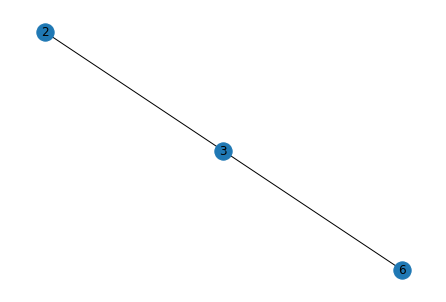

In [62]:
ruta=Red.subgraph(Dijkstra)
nx.draw(ruta,with_labels=True)


Árbol de expansión mínima

---




In [119]:
def AEM(RED, NODO_INICIAL):
    distmin = {}   
    lista = {}
    Nodos_apagados = list(RED.nodes()) 
    MAXDIST = 9999
    for v in RED.nodes():
        distmin[v] = MAXDIST
        lista[v] = 0
    distmin[NODO_INICIAL] = 0
    while Nodos_apagados:
        u = Nodos_apagados[0]
        for v in Nodos_apagados:
            if (distmin[v] < distmin[u]):
                u = v
        Nodos_apagados.remove(u)
        for v in RED.adj[u]:
            if (v in Nodos_apagados) and (RED[u][v]['Valor'] < distmin[v]):
                lista[v] = u
                distmin[v] = RED[u][v]['Valor']
    return lista

In [120]:
Resultado=AEM(Red,1)
Resultado

{1: 0, 2: 1, 3: 2, 4: 3, 5: 3, 6: 5, 7: 6, 8: 6}

In [121]:
Matriz =Resultado.items()
DF = pd.DataFrame(Matriz)
DF.columns = ["Origen","Destino"]
DF["Destino"] = DF["Destino"].astype(int)
DF

,Origen,Destino
0,1,0
1,3,2
2,2,1
3,5,3
4,4,3
5,6,5
6,7,6
7,8,6


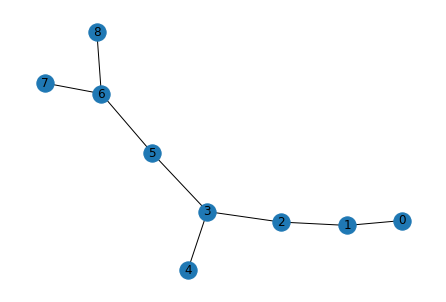

In [126]:
RedPRIM = nx.from_pandas_edgelist(df=DF,source="Origen",target="Destino")
nx.draw(RedPRIM,with_labels=True)